# ***Importing all the necessary modules***

---

In [ ]:
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns
import math

# ***Loading the Iris Dataset***

---



In [ ]:
data = datasets.load_iris()
X = data.data
y = data.target

ind = np.where(y == 2)[0][0]  # Finding the index of the first occurrence of virginica
y = y[:ind]  # and considering only the 2 classes Setosa and Versicolor.
X = X[:ind]

bias_unit = np.ones(ind).reshape((ind, 1))
X = np.append(X, bias_unit, axis=1)

# ***Splitting the data into train and test data***

---

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size = 0.33, random_state = 1234, shuffle = True)
y_test = y_test.reshape((len(y_test),1))
y_train = y_train.reshape((len(y_train),1))

# ***Plotting curves of the target variable and the 4 features***

---

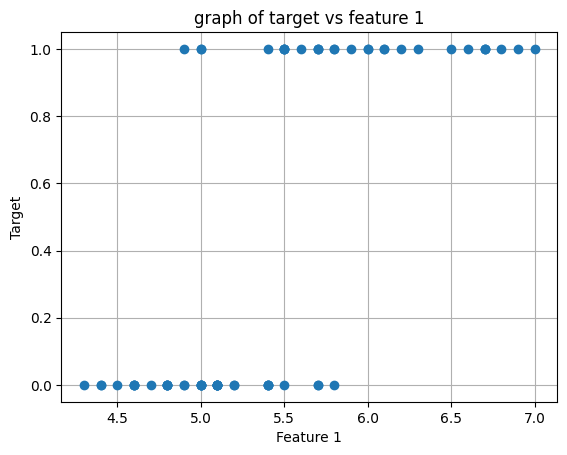

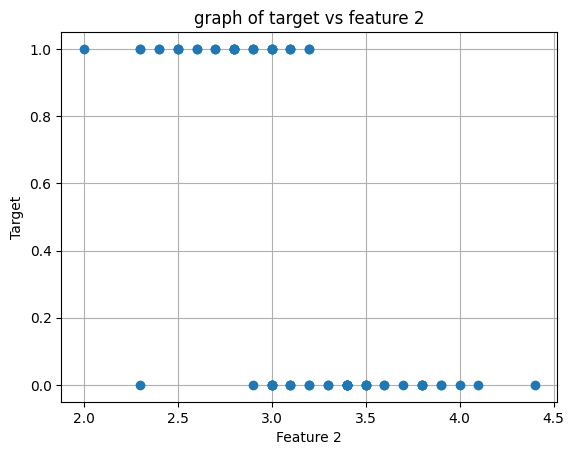

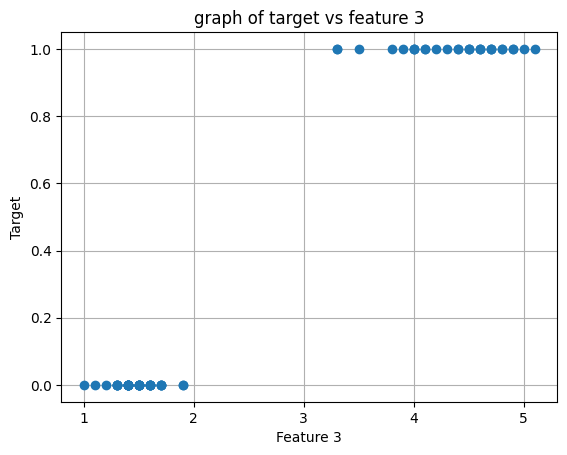

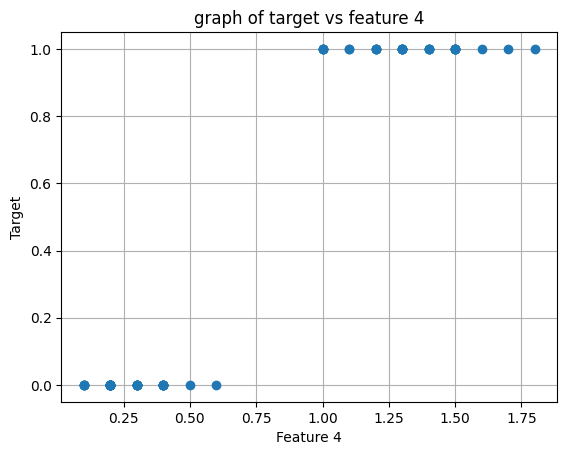

In [ ]:
x0,x1,x2,x3 = pd.Series(list(X_train[:,:1].reshape((len(X_train),)))),pd.Series(list(X_train[:,1:2].reshape((len(X_train),)))),pd.Series(list(X_train[:,2:3].reshape((len(X_train),)))),pd.Series(list(X_train[:,3:4].reshape((len(X_train),))))
ypts=y_train
xpts=x0
plt.title("graph of target vs feature 1")
plt.ylabel("Target")
plt.xlabel("Feature 1")
plt.plot(xpts,ypts,'o')
plt.grid()
plt.show()

xpts=x1
plt.title("graph of target vs feature 2")
plt.ylabel("Target")
plt.xlabel("Feature 2")
plt.plot(xpts,ypts,'o')
plt.grid()
plt.show()

xpts=x2
plt.title("graph of target vs feature 3")
plt.ylabel("Target")
plt.xlabel("Feature 3")
plt.plot(xpts,ypts,'o')
plt.grid()
plt.show()


xpts=x3
plt.title("graph of target vs feature 4")
plt.ylabel("Target")
plt.xlabel("Feature 4")
plt.plot(xpts,ypts,'o')
plt.grid()
plt.show()

# ***Objected-oriented Approach: Declaring a python class for the model*** 

---

In [ ]:
class model():
    def __init__(self, weights_and_biases=np.ones((5,1)), learning_rate=0.01, epochs=500):
        self.w_ = weights_and_biases
        self.lr = learning_rate
        self.n = epochs

    def sigmoid(self, z):
        return 1.0 / (1 + np.exp(-z))

    def loss(self, y, y_hat):
        loss = -np.mean(y * np.log(y_hat) - (1 - y) * np.log(1 - y_hat))
        return loss

    def gradients(self, X, y, y_hat):
        m = X.shape[0]
        # Gradient of loss w.r.t weights.
        grad_w = (1 / m) * np.dot(X.T, (y_hat - y))
        # Gradient of loss w.r.t bias.
        grad_w[4][0] = (1 / m) * np.sum((y_hat - y))
        return grad_w

    def normalize(self, X):
        X = (X - X.mean(axis=0)) / X.std(axis=0)
        return X

    def fit(self, X, y, bs):
        m, n = X.shape
        # Normalizing the inputs.
        X[:, :4] = self.normalize(X[:, :4])
        # Empty list to store losses.
        losses = []
        # Training loop.
        for epoch in range(self.n):
            for i in range((m - 1) // bs + 1):
                # Defining batches. SGD.
                start_i = i * bs
                end_i = start_i + bs
                xb = X[start_i:end_i]
                yb = y[start_i:end_i]
                # Calculating hypothesis/prediction.
                y_hat = self.sigmoid(np.dot(xb, self.w_))
                # Getting the gradients of loss w.r.t parameters.
                grad_w = self.gradients(xb, yb, y_hat)
                # Updating the parameters.
                self.w_ -= self.lr * grad_w

            # Calculating loss and appending it in the list.
            l = self.loss(y, self.sigmoid(np.dot(X, self.w_)))
            losses.append(l)
        # Returning weights, bias, and losses (List).
        return losses

    def predict(self, X):
        # Normalizing the inputs.
        X[:, :4] = self.normalize(X[:, :4])
        # Calculating predictions/y_hat.
        preds = self.sigmoid(np.dot(X, self.w_))
        # if y_hat >= 0.5 --> round up to 1
        # if y_hat < 0.5 --> round down to 0
        pred_class = np.where(preds >= 0.5, 1, 0)
        return pred_class

    def accuracy(self, y, y_hat):
        accuracy = np.sum(y == y_hat) / len(y)
        return accuracy


# ***Gauging my model: Checking the accuracy score***

---

In [ ]:
my_model = model()

losses = my_model.fit(X_train,y_train,10)

y_pred = my_model.predict(X_test)

print("The accuracy of the model is: ",my_model.accuracy(y_test,y_pred))

The accuracy of the model is:  1.0


# ***Plotting the graph for the losses as the model is progresses with the epoches***

---

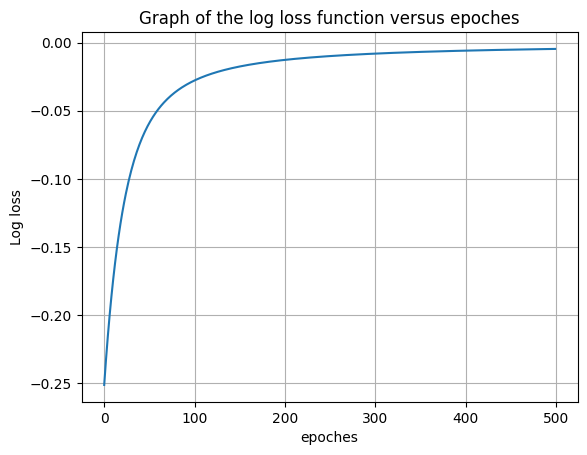

In [ ]:
ypts = losses
xpts = list(range(500))

plt.title("Graph of the log loss function versus epoches")
plt.xlabel("epoches")
plt.ylabel("Log loss")
plt.plot(xpts,ypts)
plt.grid()
plt.show()

# Above we see a beautiful plot of losses with epoches. As the model progresses with the iterations, the log loss decreases and eventually asymptotes to 0. 